<a href="https://colab.research.google.com/github/vvillbiii/business-data-analytics-and-intelligence-colab-notebooks/blob/main/Gaussian_Mixture_Model_will.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# library , directory, data

---



In [ ]:
%cd /content/drive/MyDrive/1 Projects/Data Mining for Business in Python/4. Clustering - Gaussian Mixture Model

/content/drive/MyDrive/1 Projects/Data Mining for Business in Python/4. Clustering - Gaussian Mixture Model


In [ ]:
#import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [ ]:
#dataset
data = pd.read_csv('Country-data.csv')

# model can only work with numbers 
#removing countries from dataset
df = data.iloc[:, 1:]
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# finding optimal number of Clusters

Text(0.5, 0, 'number of components')

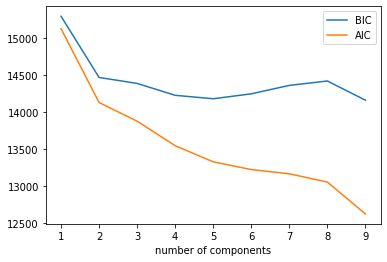

In [ ]:
#finding optimal number of cluster
n_components = np.arange(1,10)
models = [GaussianMixture(n, 
                          random_state=1502).fit(df)
                          for n in n_components]
plt.plot(n_components,
         [m.bic(df) for m in models], 
         label = "BIC")
plt.plot(n_components,
         [m.aic(df) for m in models], 
         label = "AIC")
plt.legend()
plt.xlabel('number of components')

In [ ]:
#GMM
models = GaussianMixture(n_components=4, 
                        random_state=1502).fit(df)

# interpretation 

In [ ]:
# Predicting cluster by country 
cluster = pd.Series(models.predict(df))
cluster[:10]

In [ ]:
#assign a cluster in the dataset 
data["Cluster"] = cluster 
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster,0,1,2,3
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,0.0,1.00,0.00,0.0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,0.0,0.96,0.04,0.0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,0.0,0.98,0.02,0.0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,0.0,1.00,0.00,0.0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,0.0,0.00,1.00,0.0


In [ ]:
#searching a specific country 
data.loc[data['country'] == "Spain"]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster,0,1,2,3
139,Spain,3.8,25.5,9.54,26.8,32500,0.16,81.9,1.37,30700,2,0.0,0.0,1.0,0.0


In [ ]:
# create the probabilites fo belonging to any cluster
probabilities = round(pd.DataFrame(models.predict_proba(df)), 2)
probabilities.head()

,0,1,2,3
0,0.0,1.00,0.00,0.0
1,0.0,0.96,0.04,0.0
2,0.0,0.98,0.02,0.0
3,0.0,1.00,0.00,0.0
4,0.0,0.00,1.00,0.0


In [ ]:
# joining probabilities with data
data = pd.concat([data, probabilities], axis=1)
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster,0,1,2,3
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,0.0,1.00,0.00,0.0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,0.0,0.96,0.04,0.0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,0.0,0.98,0.02,0.0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,0.0,1.00,0.00,0.0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,0.0,0.00,1.00,0.0


In [ ]:
 #interpretating data
interpretation = pd.DataFrame(models.means_,
                               columns = list(df.columns))
interpretation

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,3.500000,92.900000,9.583333,74.600000,69833.333333,3.295667,81.500000,1.700000,89133.333333
1,56.778410,31.973187,6.189660,44.466457,6230.860951,10.397333,65.702144,3.636511,2931.541250
2,10.585236,50.105673,8.010427,48.449987,28235.545432,3.499218,77.658786,1.916713,23823.053830
3,8.275000,99.100000,2.810000,64.050000,88225.000000,8.708500,79.375000,1.817500,47675.000000
